In [129]:
import pandas as pd
from datetime import datetime,date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [111]:
companyOne = "AAPL"

start = "2015-01-01"
end = "2023-01-01"

apple = yf.download(companyOne,start,end)
apple = apple.reset_index()
dateList = []
for i in apple['Date']:
    dateList.append(i.timestamp())
apple['DateString'] = dateList

[*********************100%%**********************]  1 of 1 completed


In [101]:
dataBinary = apple[['DateString','Open']]

In [104]:
dataBinary['DateString'][0]

1420156800.0

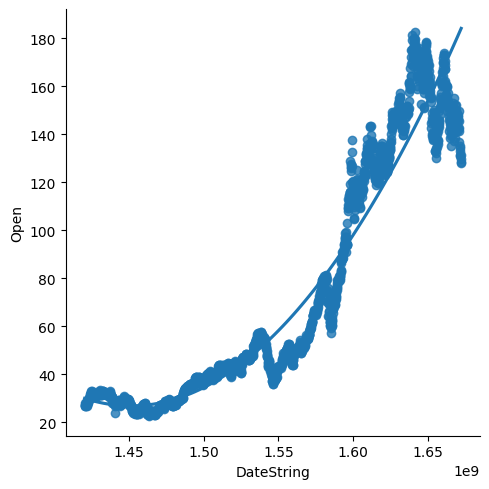

In [120]:
sns.lmplot(x ="DateString", y ="Open", data = dataBinary, order = 2, ci = None)

In [117]:
X = np.array(dataBinary['DateString']).reshape(-1,1)
Y = np.array(dataBinary['Open']).reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

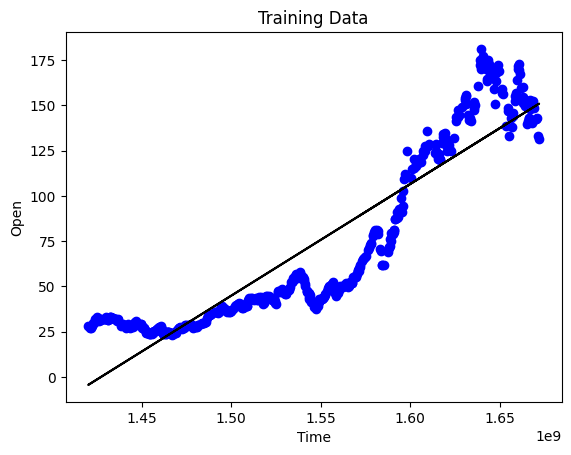

In [144]:
Y_pred = regr.predict(X_test)
plt.scatter(X_test, Y_test, color ='b')
plt.plot(X_test, Y_pred, color ='k')
plt.title("Training Data")
plt.xlabel("Time")
plt.ylabel("Open")
plt.show()

In [140]:
predDates = [datetime(2024,1,1), datetime(2024,2,1), datetime(2024,3,1), datetime(2024,4,1), datetime(2024,5,1), datetime(2024,6,1), datetime(2024,7,1),datetime(2024,8,1), datetime(2024,9,1), datetime(2024,10,1), datetime(2024,11,1), datetime(2024,12,1)]
predTime = []
for i in predDates:
    predTime.append(i.timestamp())
predTime = np.array(predTime).reshape(-1,1)

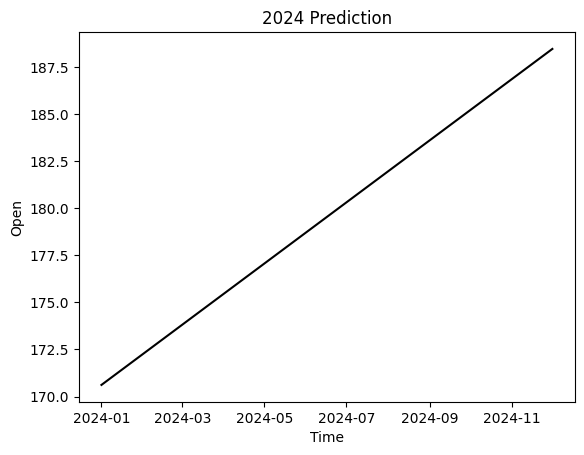

In [142]:
predOpen = regr.predict(predTime)
plt.plot(predDates, predOpen, color ='k')
plt.title("2024 Prediction")
plt.xlabel("Time")
plt.ylabel("Open")
plt.show()